# GOLD PRICE PREDICTION

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#LOADING DATASET
gold_data = pd.read_csv('FINAL_USO.csv')

In [3]:
#STRUCTURE OF DATASET
gold_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [4]:
#DATASET SHAPE
gold_data.shape

(1718, 81)

In [5]:
#DATASET INFO
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [6]:
#CONVERT DATE COLUMN TO DATETIME
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [7]:
#SORTING DATASET
gold_data = gold_data.sort_values('Date')

In [8]:
#DROPPING NULL VALUES
gold_data = gold_data.dropna()

In [9]:
#EXTRACTING 'DATE' & 'CLOSE' COLUMNS
data = gold_data[['Date','Close']]

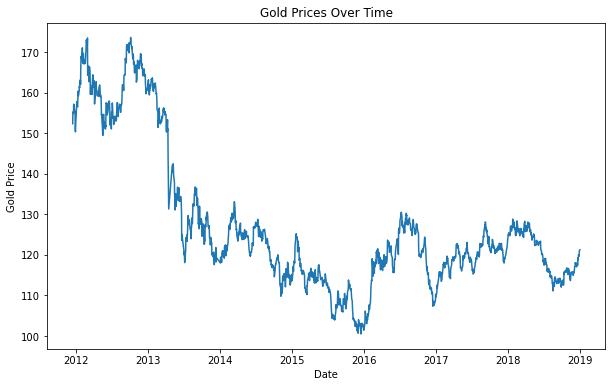

In [10]:
#PLOT CLOSING PRICES
plt.figure(figsize = (10,6))
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Prices Over Time')
plt.show()

In [11]:
#NUMERICAL REPRESENTATION OF DATA
data = data.copy()
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [12]:
#SPLITTING DATASET TO TRAINING AND TESTING SUBSETS
X = data[['Days']]
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
#CREATING LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
#MAKING PREDICTIONS
Y_pred = model.predict(X_test)

In [15]:
#EVALUATING MODEL
mse = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error : ',mse)

Mean Squared Error :  163.49046233077203


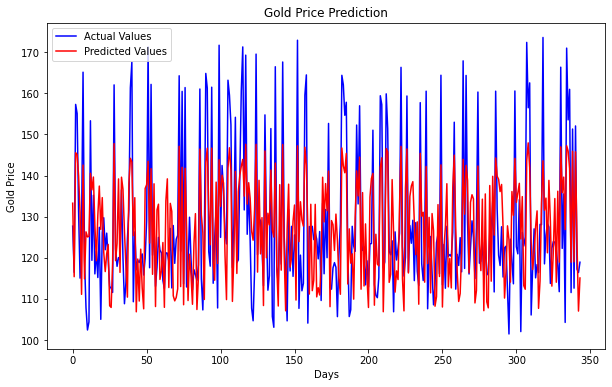

In [16]:
#VISUALIZING RESULTS 1
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, color='blue', label='Actual Values')
plt.plot(Y_pred, color='red', label='Predicted Values')
plt.xlabel('Days')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()

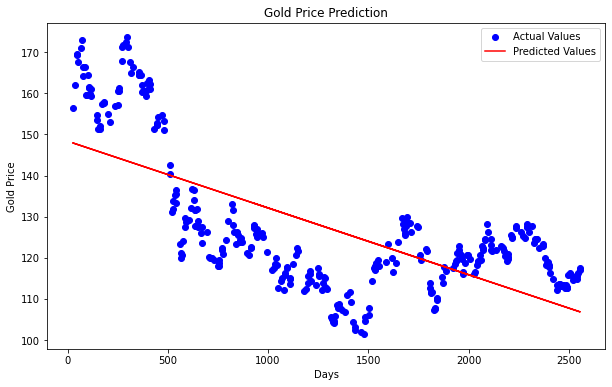

In [17]:
#VISUALIZING RESULTS 2
plt.figure(figsize=(10, 6))
plt.scatter(X_test.values, Y_test.values, color='blue', label='Actual Values')
plt.plot(X_test.values, Y_pred, color='red', label='Predicted Values')
plt.xlabel('Days')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()

# MANUAL TESTING

In [18]:
#CREATE A FUNCTION FOR MANUAL TESTING
from datetime import datetime
def predict_gold_price(model):
    input_date = input("Enter Date (YYYY-MM-DD) : ")
    date = datetime.strptime(input_date, "%Y-%m-%d")
    days = (date - data['Date'].min()).days
    input_data = pd.DataFrame({'Days': [days]})
    prediction = model.predict(input_data)
    print(f"The predicted gold price for {date} is : {prediction[0]}")

In [19]:
#PREDICTING PRICE FOR A PARTICULAR DAY
predict_gold_price(model)

Enter Date (YYYY-MM-DD) : 2023-12-10
The predicted gold price for 2023-12-10 00:00:00 is : 77.25708879331097
